<a href="https://colab.research.google.com/github/bbqgonewrong/TensorFlow-Projects/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2.8.2


#EDA

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape
N,D = X_train.shape

#Splitting the data into test and train

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.33,random_state= 69)

#Normalising all the data points using standard scaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
D,

(30,)

#Defining the model as a sequential model ...

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

model.compile(optimizer = 'adam' ,loss= 'binary_crossentropy',metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#Fitting the model



In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)
print('Train Score:',model.evaluate(X_train,y_train))
print('Test Score:',model.evaluate(X_test,y_test))

#Assessing model performance

Text(0.5, 1.0, 'Measuring model loss with test and train data')

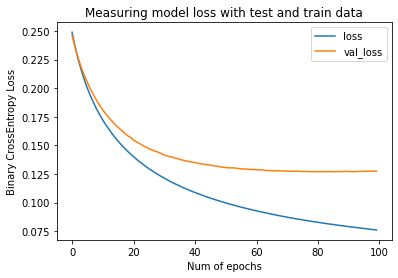

In [ ]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.xlabel('Num of epochs')
plt.ylabel('Binary CrossEntropy Loss')
plt.title('Measuring model loss with test and train data')

Text(0.5, 1.0, 'Measuring model accuracy with test and train data')

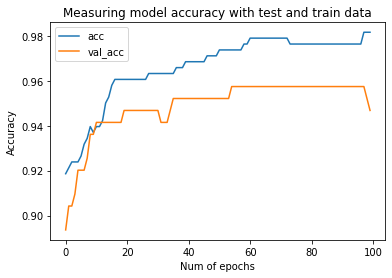

In [ ]:
plt.plot(history.history['accuracy'],label = 'acc')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.xlabel('Num of epochs')
plt.ylabel('Accuracy')
plt.title('Measuring model accuracy with test and train data')

#Making predictions